# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

# Copying Necessary Files to Colab Workspace

In [ ]:
!cp /content/drive/MyDrive/#Research/#MetaHeuriSticS/dataset/TCGA_InfoWithGrade.csv .

# Installing and importing necessary library

In [ ]:
!pip install deap
!pip install pyswarm

import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms
from pyswarm import pso
from scipy.optimize import dual_annealing, differential_evolution
import random
from numpy.random import rand
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=d2350cfb25cb78732fdc9fd892eb5ad5fe9501f28ab2e3ad7ce672ec8cca939d
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


# Read Dataset

In [ ]:
df = pd.read_csv('TCGA_InfoWithGrade.csv')
df

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,1,77.89,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
835,1,0,85.18,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
836,1,1,77.49,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
837,1,0,63.33,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Feature Correlation Visualization

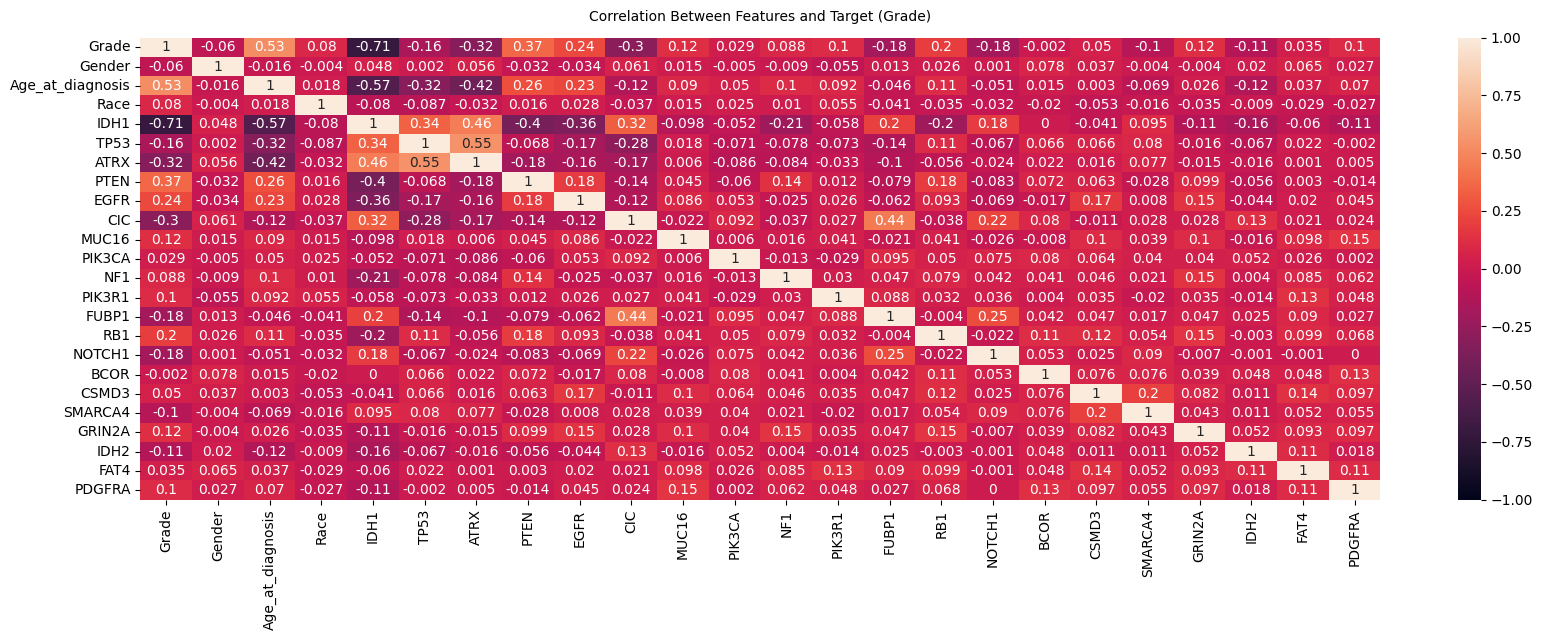

In [ ]:
import matplotlib.pyplot as plt

# Increase the size of the heatmap.
plt.figure(figsize=(20, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr().round(3), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Between Features and Target (Grade)', fontdict={'fontsize':10}, pad=12);

# Stratified Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:,0],
                                                    stratify=df.iloc[:,0],
                                                    test_size=0.25, random_state=42)

In [ ]:
X_train

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
148,0,41.32,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179,1,57.79,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
774,0,74.81,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,1,24.40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
835,0,85.18,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,0,74.16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
806,1,49.82,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
402,0,26.47,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
803,1,47.73,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
214,1,31.75,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,0,36.97,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
765,1,65.99,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279,1,30.95,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293,1,44.72,0,1,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,41.61,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
649,0,68.93,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
295,0,62.25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,1,20.98,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

,Grade
148,0
179,0
774,1
208,0
835,1
...,...
627,1
806,1
402,0
803,1


In [ ]:
y_test

,Grade
214,0
128,0
765,1
279,0
293,0
...,...
264,0
649,1
295,0
53,0


# Class Distribution

In [ ]:
print('Train: ', y_train.value_counts())

Train:  Grade
0    365
1    264
Name: count, dtype: int64


In [ ]:
print('Test: ', y_test.value_counts())

Test:  Grade
0    122
1     88
Name: count, dtype: int64


# Normalize Feature

In [ ]:
scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train.to_numpy())
X_test_scaled = scaler.transform(X_test.to_numpy())
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
X_train_scaled

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0.0,0.359289,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.579271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.806598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.133298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.945105,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,0.0,0.797916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
625,1.0,0.472820,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
626,0.0,0.160946,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
627,1.0,0.444905,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_scaled

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,1.0,0.231468,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.301189,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.688794,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.220783,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.404701,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.0,0.363163,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
206,0.0,0.728062,0.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207,0.0,0.638841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208,1.0,0.087619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Metaheuristics Algorithm Implementation
Five algorithm is implemented.
1. GA - Genetic Algorithm
2. PSO - Particle Swarm Optimization
3. SA - Simulated Annealing
4. DE - Differential Evolution
5. FPA - Flower Pollination Algorithm

Maximum iteration is set to 15 for each

In [ ]:
import warnings
warnings.filterwarnings("ignore")


MAX_ITERATIONS = 25

# Define evaluation function
def evaluate(individual):
    selected_features = [i for i in range(len(individual)) if individual[i] > 0.5]
    if not selected_features:
        return 0,  # Prevent empty feature set
    # print(selected_features)
    clf = RandomForestClassifier(n_estimators=50, random_state=42)
    clf.fit(X_train_scaled.iloc[:, selected_features], y_train)
    y_pred = clf.predict(X_test_scaled.iloc[:, selected_features])
    return accuracy_score(y_test, y_pred),

# Genetic Algorithm (GA) Implementation
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X_train_scaled.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

def genetic_algorithm(X, y):
    pop = toolbox.population(n=30)
    algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.3, ngen=MAX_ITERATIONS, verbose=False)
    best_ind = tools.selBest(pop, 1)[0]
    return [i for i in range(len(best_ind)) if best_ind[i] > 0.5]

# Particle Swarm Optimization (PSO) Implementation
def pso_function(x):
    return -evaluate(x)[0]  # Minimize negative accuracy

def pso_algorithm(X, y):

    lb = [0] * X.shape[1]
    ub = [1] * X.shape[1]
    best_pos, _ = pso(pso_function, lb, ub, swarmsize=15, maxiter=MAX_ITERATIONS)
    return [i for i in range(len(best_pos)) if best_pos[i] > 0.5]

# Simulated Annealing (SA) Implementation
def sa_function(x):
    return -evaluate(x)[0]

def sa_algorithm(X, y):
    bounds = [(0, 1) for _ in range(X.shape[1])]
    result = dual_annealing(sa_function, bounds, maxiter=MAX_ITERATIONS)
    return [i for i in range(len(result.x)) if result.x[i] > 0.5]

# Differential Evolution (DE) Implementation
def de_function(x):
    return -evaluate(x)[0]

def de_algorithm(X, y):
    bounds = [(0, 1) for _ in range(X.shape[1])]
    result = differential_evolution(de_function, bounds, strategy='best1bin', popsize=20, mutation=0.5, recombination=0.7, maxiter = MAX_ITERATIONS)
    return [i for i in range(len(result.x)) if result.x[i] > 0.5]

# Flower Pollination Algorithm (FPA) Implementation
def fpa_algorithm(X, y):
    population_size = 30
    p = 0.8  # Switch probability
    iterations = MAX_ITERATIONS
    population = rand(population_size, X.shape[1])
    best_solution = population[0]
    best_score = -evaluate(best_solution)[0]

    for _ in range(iterations):
        for i in range(population_size):
            if rand() < p:
                L = rand(X.shape[1])
                new_solution = population[i] + L * (best_solution - population[i])
            else:
                j, k = np.random.choice(population_size, 2, replace=False)
                new_solution = population[i] + rand() * (population[j] - population[k])

            new_score = -evaluate(new_solution)[0]
            if new_score > best_score:
                best_solution, best_score = new_solution, new_score

    return [i for i in range(len(best_solution)) if best_solution[i] > 0.5]

# Running all algorithms
selected_features_ga = genetic_algorithm(X_train_scaled, y_train)
selected_features_pso = pso_algorithm(X_train_scaled, y_train)
selected_features_sa = sa_algorithm(X_train_scaled, y_train)
selected_features_de = de_algorithm(X_train_scaled, y_train)
selected_features_fpa = fpa_algorithm(X_train_scaled, y_train)

fs_dic = {
    'GA': selected_features_ga,
    'PSO': selected_features_pso,
    'SA': selected_features_sa,
    'DE': selected_features_de,
    'FPA': selected_features_fpa
    }

print("GA Selected Features:", selected_features_ga)
print("PSO Selected Features:", selected_features_pso)
print("SA Selected Features:", selected_features_sa)
print("DE Selected Features:", selected_features_de)
print("FPA Selected Features:", selected_features_fpa)


Stopping search: maximum iterations reached --> 25
GA Selected Features: [0, 2, 3, 6, 7, 8, 10, 14, 15, 20, 21, 22]
PSO Selected Features: [0, 3, 4, 5, 7, 10, 12, 13, 15, 18, 20, 21, 22]
SA Selected Features: [0, 3, 9, 11, 13, 15, 16, 17, 18, 20, 21]
DE Selected Features: [0, 3, 4, 5, 7, 10, 12, 13, 15, 20, 22]
FPA Selected Features: [0, 2, 5, 10, 12, 16, 17, 21, 22]


In [ ]:
# Define function to evaluate classifiers
def evaluate_classifiers(X_train, X_test, y_train, y_test, mh):
    classifiers = {
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC(probability=True),
        'KNN': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(n_estimators=50),
        'AdaBoost': AdaBoostClassifier()
    }

    results = []
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='binary')
        rec = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')
        auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
        cm = confusion_matrix(y_test, y_pred)
        spec = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # Specificity calculation



        results.append([name, mh,acc, prec, rec, f1, auc, spec])

    return pd.DataFrame(results, columns=['Classifier','MetaHeuristics Algorithm' ,'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC', 'Specificity'])

# Run evaluation
df_results = []
for mh, fs in fs_dic.items():
  X_train = X_train_scaled.iloc[:, fs]
  X_test = X_test_scaled.iloc[:, fs]
  classifier_results = evaluate_classifiers(X_train, X_test, y_train, y_test, mh)
  df_results.append(classifier_results)
result_df = pd.concat(df_results).reset_index()
result_df

,index,Classifier,MetaHeuristics Algorithm,Accuracy,Precision,Recall,F1-score,AUC,Specificity
0,0,Logistic Regression,GA,0.876190,0.803922,0.931818,0.863158,0.908625,0.836066
1,1,SVM,GA,0.871429,0.801980,0.920455,0.857143,0.902757,0.836066
2,2,KNN,GA,0.838095,0.821429,0.784091,0.802326,0.916356,0.877049
3,3,Random Forest,GA,0.876190,0.803922,0.931818,0.863158,0.921013,0.836066
4,4,AdaBoost,GA,0.876190,0.803922,0.931818,0.863158,0.899450,0.836066
5,0,Logistic Regression,PSO,0.871429,0.796117,0.931818,0.858639,0.906250,0.827869
6,1,SVM,PSO,0.871429,0.801980,0.920455,0.857143,0.896004,0.836066
7,2,KNN,PSO,0.871429,0.801980,0.920455,0.857143,0.893349,0.836066
8,3,Random Forest,PSO,0.876190,0.822917,0.897727,0.858696,0.925112,0.860656
9,4,AdaBoost,PSO,0.876190,0.803922,0.931818,0.863158,0.899637,0.836066


In [ ]:
result_df[result_df.columns[1:]].to_csv('/content/drive/MyDrive/#Research/#MetaHeuriSticS/result_df.csv', index = False)

# Without Feature Selection Result

In [ ]:
df_results = []
classifier_results = evaluate_classifiers(X_train_scaled, X_test_scaled, y_train, y_test, "No feature Selection")
df_results.append(classifier_results)
result_df = pd.concat(df_results).reset_index()
result_df

,index,Classifier,MetaHeuristics Algorithm,Accuracy,Precision,Recall,F1-score,AUC,Specificity
0,0,Logistic Regression,No feature Selection,0.880952,0.824742,0.909091,0.864865,0.913655,0.860656
1,1,SVM,No feature Selection,0.866667,0.794118,0.920455,0.852632,0.922597,0.827869
2,2,KNN,No feature Selection,0.866667,0.819149,0.875000,0.846154,0.902897,0.860656
3,3,Random Forest,No feature Selection,0.814286,0.781609,0.772727,0.777143,0.900801,0.844262
4,4,AdaBoost,No feature Selection,0.871429,0.801980,0.920455,0.857143,0.916449,0.836066
